# Testing

In [1]:
import pyqsp
from pyqsp.gadgets import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
L = 6

# First gadget
Xi_1 = np.array([[np.random.uniform() for _ in range(L)], [np.random.uniform() for _ in range(L)]])
S_1 = [[np.random.choice([0, 1]) for _ in range(L-1)], [np.random.choice([0, 1]) for _ in range(L-1)]]

# Second gadget
Xi_2 = np.array([[np.random.uniform() for _ in range(L)], [np.random.uniform() for _ in range(L)]])
S_2 = [[np.random.choice([0, 1]) for _ in range(L-1)], [np.random.choice([0, 1]) for _ in range(L-1)]]

# Third gadget
Xi_3 = np.array([[np.random.uniform() for _ in range(L)], [np.random.uniform() for _ in range(L)]])
S_3 = [[np.random.choice([0, 1]) for _ in range(L-1)], [np.random.choice([0, 1]) for _ in range(L-1)]]

In [3]:
# Gadgets
G1 = AtomicGadget(Xi_1, S_1, label="G1")
G2 = AtomicGadget(Xi_2, S_2, label="G2")
G3 = AtomicGadget(Xi_3, S_3, label="G3")

In [4]:
('G2', 0) in [('G2', 0)]

True

In [5]:
# Interlink
G = G1.interlink(G2, [(('G1', 1), ('G2', 1))])

In [6]:
G.out_labels

[('G2', 0), ('G2', 1), ('G1', 0)]

In [7]:
G_prime = G.interlink(G3, [(('G2', 0), ('G3', 1))])

In [8]:
print("In labels = {}".format(G_prime.in_labels))
print("Out labels = {}".format(G_prime.out_labels))

In labels = [('G1', 0), ('G1', 1), ('G2', 0), ('G3', 0)]
Out labels = [('G3', 0), ('G3', 1), ('G2', 1), ('G1', 0)]


In [9]:
# The new sequence
print(G_prime.get_sequence(('G3', 1)))

['G1', 'G2']
['G1']
['G1']
['G1']
([0.6117661040551724, 1.529652303458246, 0.8788318374765252, 0.5657548391159132, 0.26333483685927717, 0.3977704593010726, 0.21829829860079975, 0.5727482987029668, 0.5657548391159132, 0.26333483685927717, 0.3977704593010726, 0.21829829860079975, 0.22672297843026035, 0.569800830168369, 1.9363195529076067, 0.8788318374765252, 0.5657548391159132, 0.26333483685927717, 0.3977704593010726, 0.21829829860079975, 0.5727482987029668, 0.5657548391159132, 0.26333483685927717, 0.3977704593010726, 0.21829829860079975, 0.22672297843026035, 0.569800830168369, 0.6761767924323837, 1.3303021877081185, 0.8788318374765252, 0.5657548391159132, 0.26333483685927717, 0.3977704593010726, 0.21829829860079975, 0.5727482987029668, 0.5657548391159132, 0.26333483685927717, 0.3977704593010726, 0.21829829860079975, 0.22672297843026035, 0.569800830168369, 1.2132017481927506], [('G3', 0), ('G2', 0), ('G1', 0), ('G1', 1), ('G1', 1), ('G1', 0), ('G1', 1), ('G1', 0), ('G1', 1), ('G1', 1), (

In [10]:
f = G.get_qsp_unitary(('G2', 0))

In [11]:
# QSP polynomial
P = lambda x, y, z : f({('G1', 0): x, ('G1', 1): y, ('G2', 0): z})[0][0]
P_restricted = lambda x, y : P(x, y, 0.5)

In [12]:
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

In [196]:
Vals = []
for i in range(len(Y)):
    K = []
    for j in range(len(Y)):
        K.append(P_restricted(X[i][j], Y[i][j]))
    Vals.append(K)

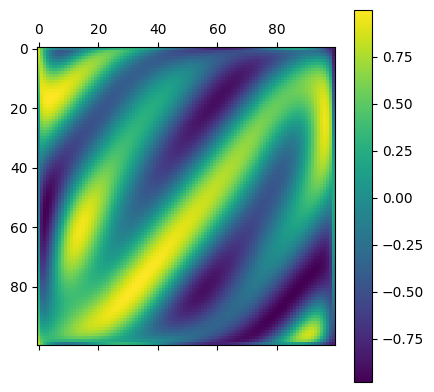

In [197]:
plt.matshow(np.real(Vals))
plt.colorbar()